In [4]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
df = pd.read_csv("main.csv")
# sample if too dense
fig = px.parallel_coordinates(
    df.sample(200, random_state=42),
    color="Metric_A",
    dimensions=["Metric_A","Metric_B","Metric_C","Score_1","Score_2"],
    labels={"Metric_A":"Metric A","Metric_B":"Metric B","Metric_C":"Metric C"},
    color_continuous_scale=px.colors.sequential.Viridis
)
fig.update_layout(title="Parallel Coordinates: Metrics & Scores")
fig.show()


<Figure size 1500x1500 with 0 Axes>

In [10]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
plt.figure(figsize=(5,8))

radar = pd.read_csv("radar_agg.csv")
entity = "Entity_1"  # change to any Entity_
row = radar[radar["Entity"]==entity].iloc[0]
categories = ["Score_1","Score_2","Score_3","Score_4","Score_5"]
values = row[categories].tolist()
# close the loop
values += [values[0]]
cat_loop = categories + [categories[0]]

fig = go.Figure()
fig.add_trace(go.Scatterpolar(r=values, theta=cat_loop, fill='toself', name=entity))
fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[0,100])),
                  title=f"Radar plot - {entity}")
fig.show()


<Figure size 500x800 with 0 Axes>

In [6]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("main.csv", parse_dates=["Date"])
# Example: timeseries of Metric_A aggregated by Date and Category
ts = df.groupby(["Date","Category"])["Metric_A"].mean().reset_index()
fig = px.line(ts, x="Date", y="Metric_A", color="Category", title="Timeline: Metric_A by Category")
fig.show()


In [7]:
import pandas as pd
import plotly.express as px

hier = pd.read_csv("hierarchy_agg.csv")
fig = px.treemap(hier, path=["Region","Division","Category"], values="Total_Value",
                 title="Treemap: Region > Division > Category")
fig.show()


In [8]:
import plotly.express as px
hier = pd.read_csv("hierarchy_agg.csv")
fig = px.sunburst(hier, path=["Region","Division","Category"], values="Total_Value",
                  title="Sunburst: Region > Division > Category")
fig.show()


In [13]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go

edges = pd.read_csv("edges.csv")
G = nx.DiGraph()
for _, r in edges.iterrows():
    G.add_edge(r.Source, r.Target, weight=float(r.Weight))

pos = nx.spring_layout(G, seed=42)  # positions
edge_x, edge_y = [], []
for e in G.edges():
    x0,y0 = pos[e[0]]
    x1,y1 = pos[e[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

node_x, node_y, node_text = [], [], []
for n in G.nodes():
    x,y = pos[n]
    node_x.append(x); node_y.append(y)
    node_text.append(n)

edge_trace = go.Scatter(x=edge_x, y=edge_y, mode='lines', line=dict(width=1), hoverinfo='none')
node_trace = go.Scatter(x=node_x, y=node_y, mode='markers+text', text=node_text, textposition="top center",
                        marker=dict(size=20))
fig = go.Figure(data=[edge_trace, node_trace])
fig.update_layout(title="Network Graph (entities & categories)")
fig.show()


ModuleNotFoundError: No module named 'networkx'

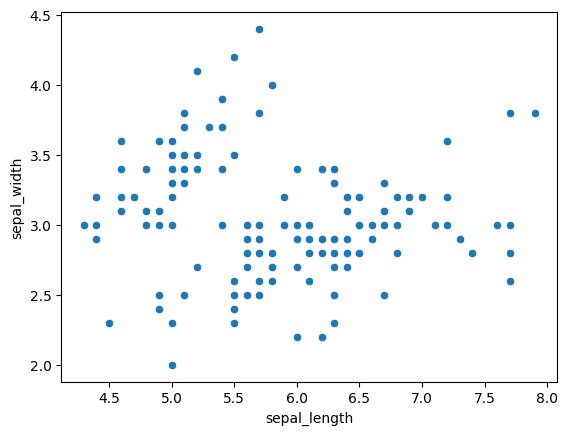

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load a sample dataset
data = sns.load_dataset("iris")

# Create a simple scatter plot
sns.scatterplot(x="sepal_length", y="sepal_width", data=data)

# Show the plot
plt.show()
